In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%ls

drive/  sample_data/  test_trainer/


In [ ]:
traindata_all = pd.read_csv('./drive/MyDrive/TFG/multimodal_train.tsv', sep='\t')
traindata_all.head()

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,Alexithymia,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,i.imgur.com,True,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,NaN,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1,0,0
1,VIDCAs17,this concerned sink with a tiny hat,1.534727e+09,i.redd.it,True,98pbid,https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...,NaN,2.0,119,pareidolia,This concerned sink with a tiny hat,0.99,0,2,2
2,prometheus1123,hackers leak emails from uae ambassador to us,1.496511e+09,aljazeera.com,True,6f2cy5,https://external-preview.redd.it/6fNhdbc6K1vFA...,NaN,1.0,44,neutralnews,Hackers leak emails from UAE ambassador to US,0.92,1,0,0
3,NaN,puppy taking in the view,1.471341e+09,i.imgur.com,True,4xypkv,https://external-preview.redd.it/HLtVNhTR6wtYt...,NaN,26.0,250,photoshopbattles,PsBattle: Puppy taking in the view,0.95,1,0,0
4,3rikR3ith,i found a face in my sheet music too,1.525318e+09,i.redd.it,True,8gnet9,https://preview.redd.it/ri7ut2wn8kv01.jpg?widt...,NaN,2.0,13,pareidolia,I found a face in my sheet music too!,0.84,0,2,2


In [ ]:
traindata_all['Text label'] = traindata_all['6_way_label'].map({
                                            0:'True',
                                            1:'Satire/Parody',
                                            2:'Misleading Content',
                                            3:'Imposter Content',
                                            4:'False Connection',
                                            5:'Manipulated Content',
                                        })                                          

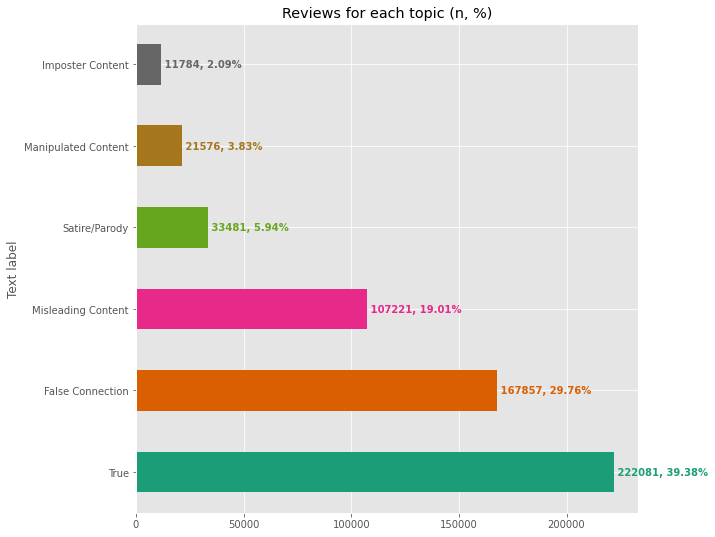

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


num_classes = len(traindata_all["Text label"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

traindata_all['Text label'].value_counts().plot.barh(title="Reviews for each topic (n, %)", 
                                                 ylabel="Text label",
                                                 color=colors,
                                                 figsize=(9,9))

for i, v in enumerate(traindata_all['Text label'].value_counts()):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/traindata_all.shape[0],2))+"%", 
           color=c, 
           va='center', 
           fontweight='bold')


We need to balance the data undersampling to the size of 'Imposter Content'

In [ ]:
df_0 = traindata_all[traindata_all['6_way_label']==0]
df_1 = traindata_all[traindata_all['6_way_label']==1]
df_2 = traindata_all[traindata_all['6_way_label']==2]
df_3 = traindata_all[traindata_all['6_way_label']==3]
df_4 = traindata_all[traindata_all['6_way_label']==4]
df_5 = traindata_all[traindata_all['6_way_label']==5]

In [ ]:
df_0_under = df_0.sample(df_3.shape[0])
df_1_under = df_1.sample(df_3.shape[0])
df_2_under = df_2.sample(df_3.shape[0])
df_4_under = df_4.sample(df_3.shape[0])
df_5_under = df_5.sample(df_3.shape[0])

In [ ]:
train_balanced = pd.concat([df_0_under, df_1_under, df_2_under, df_3, df_4_under, df_5_under])
train_balanced = train_balanced.sample(frac=1).reset_index(drop=True) # to shuffle after the concatenation

In [ ]:
train_balanced

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label,Text label
0,Kaine-Rocks-1,i found a usb port on the ground,1.567999e+09,i.redd.it,True,d1lask,https://preview.redd.it/ofsl5i1bkhl31.jpg?widt...,NaN,5.0,24,mildlyinteresting,I found a usb port on the ground,0.84,1,0,0,True
1,sky033,this father dressed his daughter for day care ...,1.467671e+09,archive.is,True,4r9l24,https://external-preview.redd.it/581zpQghc7NzW...,NaN,2.0,78,savedyouaclick,"This Father Dressed His Daughter For Day Care,...",0.88,0,2,5,Manipulated Content
2,forhammer,el centro,1.363889e+09,NaN,True,c8zvzmp,http://i.imgur.com/1SQwNbZ.jpg,1aq6ym,NaN,167,psbattle_artwork,el centro!,NaN,0,2,4,False Connection
3,CptSasquatch,quack addict,1.403872e+09,NaN,True,ciife9p,http://i.imgur.com/6HVuHeC.jpg,298cor,NaN,153,psbattle_artwork,Quack addict,NaN,0,2,4,False Connection
4,alanbchk,shaolin monk training with reddit socks,1.386458e+09,NaN,True,cdw4xq0,http://i.imgur.com/T7wAr7z.jpg,1rfzbj,NaN,2,psbattle_artwork,Shaolin Monk Training With Reddit Socks,NaN,0,2,4,False Connection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70699,tokin4torts,fat cat sitting up with shocked eyes,1.520639e+09,i.redd.it,True,83b9q9,https://preview.redd.it/apxrzcspitk01.jpg?widt...,NaN,2.0,6,photoshopbattles,PsBattle: Fat cat sitting up with shocked eyes,0.72,1,0,0,True
70700,wallymcwalrus,polish antirussian poster depicting trotsky on...,1.406060e+09,upload.wikimedia.org,True,2bfd5k,https://external-preview.redd.it/tXCzu8ML54Imo...,NaN,4.0,25,propagandaposters,"Polish anti-russian poster, depicting Trotsky ...",0.85,0,1,5,Manipulated Content
70701,TheEndersALot,the good death by no regret,1.561410e+09,i.redd.it,True,c4vi7h,https://preview.redd.it/35hnpozoad631.png?widt...,NaN,0.0,6,fakealbumcovers,The Good Death by No Regret,0.75,0,2,1,Satire/Parody
70702,all-top-today_SS,its not just cats and dogs that can be stored ...,1.531663e+09,i.redd.it,True,8z1vmg,https://preview.redd.it/q8z651e220a11.jpg?widt...,NaN,20.0,417,subredditsimulator,It’s not just cats and dogs that can be stored...,0.99,0,2,3,Imposter Content


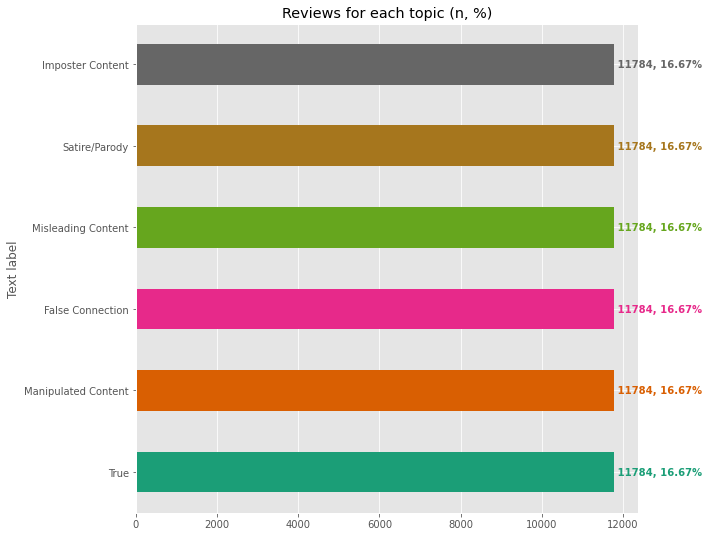

In [ ]:
plt.style.use('ggplot')


num_classes = len(train_balanced["Text label"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

train_balanced['Text label'].value_counts().plot.barh(title="Reviews for each topic (n, %)", 
                                                 ylabel="Text label",
                                                 color=colors,
                                                 figsize=(9,9))

for i, v in enumerate(train_balanced['Text label'].value_counts()):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/train_balanced.shape[0],2))+"%", 
           color=c, 
           va='center', 
           fontweight='bold')

In [ ]:
test_all = pd.read_csv('./drive/MyDrive/TFG/multimodal_test_public.tsv', sep='\t')
validate_all = pd.read_csv('./drive/MyDrive/TFG/multimodal_validate.tsv', sep='\t')

test_all.head()

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,trustbytrust,stargazer,1.425139e+09,NaN,True,cozywbv,http://i.imgur.com/BruWKDi.jpg,2xct9d,NaN,3,psbattle_artwork,stargazer,NaN,0,2,4
1,NaN,yeah,1.438173e+09,NaN,True,ctk61yw,http://i.imgur.com/JRZT727.jpg,3f0h7o,NaN,2,psbattle_artwork,yeah,NaN,0,2,4
2,chaseoes,pd phoenix car thief gets instructions from yo...,1.560492e+09,abc15.com,True,c0gl7r,https://external-preview.redd.it/1A2_4VwgS8Qd2...,NaN,2.0,16,nottheonion,PD: Phoenix car thief gets instructions from Y...,0.89,1,0,0
3,SFepicure,as trump accuses iran he has one problem his o...,1.560606e+09,nytimes.com,True,c0xdqy,https://external-preview.redd.it/9BKRcgvaobpTo...,NaN,4.0,45,neutralnews,"As Trump Accuses Iran, He Has One Problem: His...",0.78,1,0,0
4,fragments_from_Work,believers hezbollah,1.515139e+09,i.imgur.com,True,7o9rmx,https://external-preview.redd.it/rbwXHncnjVh51...,NaN,40.0,285,propagandaposters,"""Believers"" - Hezbollah 2011",0.95,0,1,5


In [ ]:
test_all['Text label'] = test_all['6_way_label'].map({
                                            0:'True',
                                            1:'Satire/Parody',
                                            2:'Misleading Content',
                                            3:'Imposter Content',
                                            4:'False Connection',
                                            5:'Manipulated Content',
                                        })   

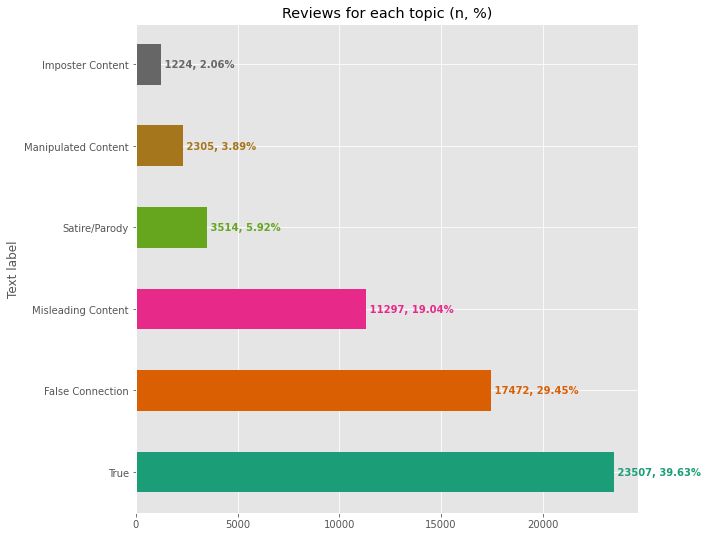

In [ ]:
plt.style.use('ggplot')


num_classes = len(test_all["Text label"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

test_all['Text label'].value_counts().plot.barh(title="Reviews for each topic (n, %)", 
                                                 ylabel="Text label",
                                                 color=colors,
                                                 figsize=(9,9))

for i, v in enumerate(test_all['Text label'].value_counts()):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/test_all.shape[0],2))+"%", 
           color=c, 
           va='center', 
           fontweight='bold')

There is no need to balance the test data.

In [ ]:
!pip install transformers
from transformers import TrainingArguments

training_args = TrainingArguments("test_trainer", num_train_epochs=3)

Necesitamos convertirlos a datasets con los que puede trabajar el trainer ya que los dataframes de panda no funcionan

In [ ]:
!pip install datasets
from datasets import Dataset

train = train_balanced[["clean_title","6_way_label"]]
eval = validate_all[["clean_title","6_way_label"]]

final_train = Dataset.from_pandas(train)
final_eval = Dataset.from_pandas(eval)

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
def tokenize_data(example):
    return tokenizer(example['clean_title'], padding='max_length')

In [ ]:
final_train = final_train.map(tokenize_data, batched=True)
final_eval = final_eval.map(tokenize_data, batched=True)


  0%|          | 0/71 [00:00<?, ?ba/s]

  0%|          | 0/60 [00:00<?, ?ba/s]

In [ ]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=6)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [45]:
!rmdir --ignore-fail-on-non-empty ./.git
!ls -a


.  ..  .config	drive  .git  sample_data  test_trainer


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model, args=training_args, train_dataset=final_train, eval_dataset=final_eval
)

In [ ]:
trainer.train()

***** Running training *****
  Num examples = 70704
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 26514


KeyError: ignored